[attention is all you need](https://arxiv.org/pdf/1706.03762)

transformer: model that extracts features for each word using a self attention mechanism to figure out how important all of the other words are in the sentance relative to the aforementioned word.

- no recurrent units are used. just weighted sums and activations allowing for optimal perf

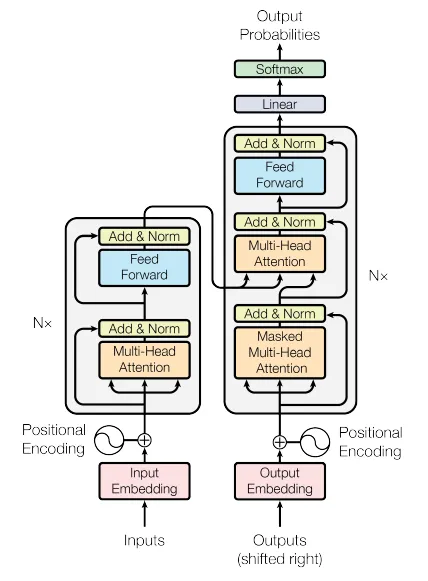

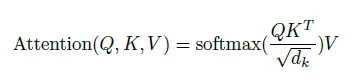

In [4]:
import torch
import torch.nn.functional as F

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

In [5]:
def scaled_dot_product_attention(queries, keys, values, mask=None):
    # Calculate the dot product, QK_transpose
    product = torch.matmul(queries, keys.transpose(-2, -1))
    
    # Get the scale factor
    keys_dim = torch.tensor(keys.size(-1), dtype=torch.float32)
    
    # Apply the scale factor to the dot product
    scaled_product = product / torch.sqrt(keys_dim)
    
    # Apply masking when it is required
    if mask is not None:
        scaled_product += (mask * -1e9)
    
    # Apply softmax and dot product with Values
    attention = torch.matmul(F.softmax(scaled_product, dim=-1), values)
    
    return attention

In [ ]:
class MultiHeadAttention(layers.Layer):
    pass